## Student: Rodolfo Lerma

# Policy Gradient Methods

## Machine Learning 530

### Stephen Elston

## Introduction to Policy Gradients

In the previous lesson we created parameterized state value and action value functions:

$$V(s_t) \approx  V(s_t,\mathbf{w}_t) \\
Q(s_t,a_t) \approx Q(s_t,a_t,\mathbf{w}_t)$$

Where, $\mathbf{w}$ is the parameter vector. Using these parameterized functions optimal policies are computed. 

Now, we will consider **parameterized policy functions** which can be written in the form:   

$$\pi(a\ |\ s, \mathbf{\theta}) = Pr\{A_t = a\ |\ S_t = s, \mathbf{\theta_t} = \mathbf{\theta} \}$$   

Where, $\mathbf{\theta} \in R^d$ is the d-dimensional **parameter vector**. The parameterized policy is often referred to as the **actor**.   

A **parameterized value function**, $\hat{v}(s, \mathbf{w})$, can be used to evaluate a policy. The value function is determined by state, s, and the d-dimensional parameter vector $\mathbf{w} \in R^d$. The parameterized value function is often referred to as the **critic**.  


**Actor-critic** algorithms use gradient methods to learn both the policy parameters and the value function or critic.     

### Parameterized Policy Approximation

How can we parameterize a policy?   

First, the parameterized policy must be **differentiable** with respect to to the parameter vector, $\mathbf{\theta}$, to be amenable to gradient ascent methods. To be learnable the policy gradient with respect to $\mathbf{\theta} \in R^d$, $\nabla_{\mathbf{\theta}} \pi(a\ |\ s, \mathbf{\theta})$, must exist and be bounded for $s \in \mathcal{S}$ and $a \in \mathcal{A}(s)$, where $\mathcal{S}$ is the set of all states, and $\mathcal{A}(s)$ is the set of all actions given s.  

Second, the policy must never become deterministic. In other words, the probability of taking an action must not be simply binary, $\{ 0,1 \}$, or $\pi(a\ |\ s, \mathbf{\theta}) \in \{ 0,1 \}$. Instead, a viable policy must allow each possible action with some probability for all states,  $0 \gt \pi(a\ |\ s, \mathbf{\theta}) \gt 1.0,\ \forall\ a,\ \forall\ s$   

### Advantages of parameterized policy 

You may be wondering what the advantages and disadvantages of parameterized policy might be? The advantages can be summarized as:

- **Improved convergence properties**. In some cases, learning a parameterized policy can be more sample efficient than other RL learning methods.   
- **Scalable to high dimensional and continuous action spaces**. We have investigated methods to learn policy for continuous state spaces. But, the examples we have examined to now have discrete action spaces. However, many real-world problems have continuous action spaces. Parameterized policy methods work well with continuous action spaces. 
- **Can learn a stochastic policies**. All of the algorithms we have examined until now create deterministic policies. Whereas, parameterized policy can be stochastic.   

The disadvantages of a parameterized policy include:

- These algorithms will **often converge to a locally optimal solutions**, rather than a globally optimal solutions.  
- Policy evaluation is relatively inefficient and has high variance. We will examine methods to reduce the variance shortly. 

## Policy optimization   

Learning with parameterized policy involves maximizing the value of the policy. A number of optimization methods have been used for this problem. Here, we will use **gradient ascent** to maximize the loss function.      

The goal of policy gradient methods is to learn a parameter vector, $\mathbf{\theta}$, which **maximizes a loss function**, $J(\mathbf{\theta})$. The commonly used learning method is to apply **gradient ascent** method of the form:  

$$\mathbf{\theta}_{t+_1} = \mathbf{\theta}_t + \alpha \widehat{\nabla J(\mathbf{\theta})}$$  

Where,

$\alpha = $ the learning rate.  
$\widehat{\nabla J(\mathbf{\theta})} \in R^d = $ the estimate of the d-dimension **gradient** vector of the loss function:

$$\widehat{\nabla_{\theta} J(\mathbf{\theta})} = 
\begin{bmatrix} 
\frac{\partial J(\mathbf{\theta})}{\partial \theta_1} \\
\frac{\partial J(\mathbf{\theta})}{\partial \theta_2} \\
\vdots \\
\frac{\partial J(\mathbf{\theta})}{\partial \theta_d}
\end{bmatrix}$$


## Policy Gradient Theorem  

We can find the **policy gradient** analytically, if $\pi_{\theta}$ is **differentiable and non-zero everywhere**. The gradient is then $\nabla_{\theta} \pi_{\theta}$. But, how can this gradient be found in practice? The answer is to apply the **policy gradient theorem**.    

For an episodic MDP we can define the performance by the loss function:

$$J(\mathbf{\theta}) = v_{\pi_{\mathbf{\theta}}}(s_0)$$  

Where $s_0$ is the starting state of the episode. In this case, there is no discounting, with $\gamma = 1$.

Given the loss function defined above the policy gradient theorem says that the gradient is:

$$\nabla_{\theta} J(\mathbf{\theta}) \propto \sum_s \mu(s) \sum_a q_\pi(s,q) \nabla_\theta \pi(a|S_t,\mathbf{\theta})\\ = \mathbb{E}_{\pi_\theta} \big[ \sum_a q_\pi(s,q) \nabla_\theta \pi(a|S_t,\mathbf{\theta}) \big]$$



### Likelihood ratio and score function

There is an efficient way to find the gradient of the policy $\pi(a|S_t,\mathbf{\theta})$. An identity of **likelihood ratios** can be used:

$$\nabla_\theta \pi(a|S_t,\mathbf{\theta}) = \pi(a|S_t,\mathbf{\theta}) \frac{ \nabla_\theta \pi(a|S_t,\mathbf{\theta})}{\pi(a|S_t,\mathbf{\theta}))} $$    

Now, use the following identity:

$$\frac{ \nabla_\theta \pi(a|S_t,\mathbf{\theta})}{\pi(a|S_t,\mathbf{\theta}))} = \nabla_\theta log\pi(a|S_t,\mathbf{\theta})$$

Where $\nabla_\theta log\pi(a|S_t,\mathbf{\theta})$ is the **score function**.

Substituting the score function gives: 

$$\nabla_\theta \pi(a|S_t,\mathbf{\theta}) = \pi(a|S_t,\mathbf{\theta}) \nabla_\theta log\pi(a|S_t,\mathbf{\theta})  $$



## Stochastic Policies

Algorithms we have examined previously, value iteration and policy iteration, result in **deterministic policies**. A deterministic policy takes an optimal action given the state. 

But, what happens if there is uncertainty as to the best action? In this case, a **stochastic policy** is required. As you likely intuit, the action taken by a stochastic policy is probabilistic.     

### Discrete stochastic actions    

The deterministic policies we have examined previously all take discrete actions. A policy with deterministic discrete actions can be represented, $\pi(a|s) \in {0,1}$. In other words, a binary response, an action is either taken or not. 

Alternatively, the actions taken by a stochastic policy are determined probabilistically. If there are a limited number of possible actions, the probability of taking an action can be computed as **softmax action preferences**:

$$\pi(a|s, \mathbf{\theta}) = \frac{e^{h(s,a,\mathbf{\theta})}}{\sum_b e^{h(s,a,\mathbf{\theta})}}$$   

The action preferences with the largest probabilities are the most likely to be taken.    

For the case of policy parameterization using linear function approximation, $\phi(s,a)\ \mathbf{\theta}$:    

$$\pi(a|s, \mathbf{\theta}) \propto  e^{\phi(s,a)^T\ \mathbf{\theta}}$$

The score function then becomes:  

$$\nabla_\theta \pi(a|S_t,\mathbf{\theta}) = \phi(s,a) - \mathbb{E}_{\pi_\theta} \big[ \phi(s,\cdot) \big]$$

### Continuous actions and Gaussian distributions   

Many real world problems have continuous action spaces. Parameterized policies are ideal for continuous action spaces. A stochastic policy for a continuous action space can be parameterized using a Gaussian distribution:    

$$a \sim \mathcal{N} \big( \mu(s),\sigma^2 \big)$$  

where, the mean action is parameterized, $u(s) = \pi(s)^T\ \mathbf{\theta}$. It is also possible to parameterize $\sigma^2$.

The score function is then:   

$$\nabla_\theta \pi(a|S_t,\mathbf{\theta}) = \frac{\big(a - \mu(s) \big) \pi(s)}{\sigma^2}$$

## Monte Carlo Policy Gradient - Reinforce  

By direct application of the policy gradient theorem the **reinforce algorithm** can be developed. For each episode, the steps of the reinforce algorithm are: 

1. Using Monte Carlo policy evaluation, the state value, $v(s)$, is computed.  
2. Update the policy parameters using the policy gradient theorem:

$$\mathbf{\theta}_{t+1} = \mathbf{\theta}_t + \alpha\ \nabla_\theta log\pi(a|S_t,\mathbf{\mathbf{\theta}})\  v_t(s)$$

Where $\alpha$ is the learning rate.  

While the reinforce algorithm converges, the variance of the Monte Carlo policy gradient can be large. 

## Reducing Variance with a Critic

How can the variance of the policy gradient be reduced? Can use a **critic** to estimate the action-value function:

$$Q_{\pi_{\mathbf{\theta}}}(s,a) \approx Q_{w}(s,a)$$

The steps of the actor-critic algorithm alternates between these steps:
- **Critic** evaluates the current parameterized policy. The critic updates the action-value function parameters, $w$.
- **Actor** determines the policy of actions. The actor updates the policy parameters, $\theta$, using the critic update. 



### Actor-Critic with approximate policy gradient

The actor-critic algorithm uses an **approximate policy gradient**.

$$\nabla_{\theta} J(\mathbf{\theta}) \approx \mathbb{E}_{\pi_\theta} \big[ \nabla_\theta\ log\ \pi_\theta(s,a)\ Q_w(s,a) \big]$$  

Which makes the parameter update:   

$$\Delta \theta = \alpha\ \nabla_\theta\ log\ \pi_\theta(s,a)\ Q_w(s,a)$$

How to estimate the action-value, $Q_w(s,a)$? Can use the policy evaluation of $\pi_\theta$, for the parameters $\theta$. We have examine several methods for policy evaluation:   
 
- Monte Carlo policy evaluation.
- Temporal difference (TD) policy evaluation. 
- Least squares fitting of policy evaluation function by least squares. 

### Bias in Actor-Critic methods

Using an approximate policy gradient introduces **bias**, which can lead to poor convergence of the solution. How can one choose a value function approximation which minimizes this bias. There are two criteria which must be met:

First, the value function must be **compatible** with the policy. By this we mean the following relationship should be true:

$$\nabla_w\ Q_w(s,a) = \nabla_\theta\ log\ \pi_\theta(s,a)$$

Second, the value function must have parameters, $\mathbf{w}$ which minimizes the mean squared error:   

$$\epsilon = \mathbb{E}_{\pi_\theta} \big[ \big( Q_{\pi_\theta}(s,a) - Q_w(s,a) \big)^2 \big]$$

The above criteria leads to the following exact policy gradient that meets both:

$$\nabla_{\theta} J(\mathbf{\theta}) = \mathbb{E}_{\pi_\theta} \big[ \nabla_\theta\ log\ \pi_\theta(s,a)\ Q_w(s,a) \big]$$  


## Gradient for Critic

How is the parameter vector, **w**, for the critic updated? As with the policy parameter vector, $\theta$, the critic parameter vector is updated using gradient ascent. 

$$\mathbf{w}_{t+1} = \mathbf{w}_t + \alpha\ \delta_t\  \nabla_w\ Q_w(s,a)$$

where,  
$\delta_t = R_{t+1} + \gamma Q(S_{t+1},a) - Q(S_t,A_t)$ is the TD error for the action values,  
$\nabla_w\ Q_w(s,a)$ is the gradient of $Q_w(s,a)$ with respect to **w**.

How can the gradient, $\nabla_w\ Q_w(s,a)$,be computed. A simple case is to represent $Q(s,a)$ using a linear function approximation: 

$$Q_w(s,a) = \phi(s,a)^T \mathbf{w}$$  

Where, $\phi(s,a)$ are the basis functions. 

Since the $Q_w(s,a)$ is linear in **w**:

$$\nabla_w\ Q_w(s,a) = \phi(s,a)$$

## Actor-critic algorithm example 

We have covered quite a lot of theory. To make the key concepts concrete, you will now work with an example of a basic actor-critic algorithm. 

The mountain-car problem is used in this example, with one significant difference. Where as the classical mountain-car problem uses discrete actions, this version uses stochastic actions. Specifically, the actions are a Normally distributed random variable. Thus, the actions are now **continuous**, *not discrete*. An algorithm that allows for continuous and stochastic actions is now required, such as an actor-critic method.  

One can imagine how the actions of the mountain-car will be affected by operating on a slippery surface. For example, if the road is icy in places actions by the RL agent become stochastic. Depending on the traction the car is able to achieve, the action will vary.   

### Mountain-car simulator   

You have already worked with the mountain-car problem. Execute the code in the cell below to run and test the simulator.

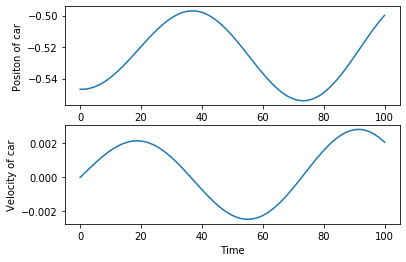

In [1]:
from math import cos, log
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
%matplotlib inline

def sim_car(x, x_dot, acceleration, x_lims = (-1.2,0.5), x_dot_lims = (-0.07,0.07), a_lims = (-1.0,1.0)):
    ## Check the limits on acceleration
    if(acceleration < x_lims[0]): acceleration = -1.0
    if(acceleration > x_lims[1]): acceleration = 1.0
    
    ## Compute velocity within limits
    x_dot_prime = x_dot + 0.001 * acceleration - 0.0025 * cos(3.0 * x)
    if(x_dot_prime < x_dot_lims[0]): x_dot_prime = x_dot_lims[0]
    if(x_dot_prime > x_dot_lims[1]): x_dot_prime = x_dot_lims[1]
        
    ## Now update position
    x_prime = x + x_dot
    if(x_prime < x_lims[0]): x_prime = x_lims[0]
    if(x_prime > x_lims[1]): x_prime = x_lims[1]
      
    ## At the terminal state or not and set reward
    if(x_prime >= x_lims[1]): 
        done = True
        reward = 100.0
    else: 
        done = False
        reward = -1.0
        
    return(x_prime, x_dot_prime, done, reward)    
        
def initalize_car(x_lims = (-0.6,-0.4)):
    ## Find random start for car
    return(nr.uniform(x_lims[0],x_lims[1]))

## Test the function
a = -0.0
x_dot = [0.0]
x = [initalize_car()]
for i in range(100):
    x_temp, x_dot_temp, done, reward = sim_car(x[i], x_dot[i], a)
    x.append(x_temp)
    x_dot.append(x_dot_temp)
    
def plot_car(x, x_dot):    
    ## Plot car position
    fig = plt.figure()
    ax1 = fig.add_subplot(211)    
    ax1.plot(x)
    ax1.set_ylabel('Positon of car')
    
    ## PLot car velocity
    ax2 = fig.add_subplot(212)  
    ax2.plot(x_dot)
    ax2.set_ylabel('Velocity of car')
    ax2.set_xlabel('Time')
    
plot_car(x,x_dot)    

### Initialize the state vectors

State for the mountain car problem has two variables, position and velocity. For this example we use tile coding with 20 discrete state values for each of these variables. To instantiate these state vectors and examine their values, execute the code in the next two cells.   

In [2]:
def x_state(x, x_lims = (-1.2,0.5), n_tiles = 20):
    """Function to compute tile state given positon"""
    state = int((x - x_lims[0])/(x_lims[1] - x_lims[0]) * float(n_tiles))
    if(state > n_tiles - 1): state = n_tiles - 1
    return(state)

for x in list(np.linspace(-1.2,0.5,20)):
    print('x = ' + str(x) + ' state = ' + str(x_state(x)))    

x = -1.2 state = 0
x = -1.1105263157894736 state = 1
x = -1.0210526315789474 state = 2
x = -0.9315789473684211 state = 3
x = -0.8421052631578947 state = 4
x = -0.7526315789473683 state = 5
x = -0.6631578947368421 state = 6
x = -0.5736842105263158 state = 7
x = -0.4842105263157894 state = 8
x = -0.39473684210526305 state = 9
x = -0.3052631578947368 state = 10
x = -0.21578947368421053 state = 11
x = -0.12631578947368416 state = 12
x = -0.03684210526315779 state = 13
x = 0.05263157894736836 state = 14
x = 0.14210526315789473 state = 15
x = 0.2315789473684211 state = 16
x = 0.3210526315789475 state = 17
x = 0.41052631578947385 state = 18
x = 0.5 state = 19


In [3]:
def x_dot_state(x_dot, x_dot_lims = (-0.07,0.07), n_tiles = 20):
    """Function to compute tile state given velocity"""
    state = int((x_dot - x_dot_lims[0])/(x_dot_lims[1] - x_dot_lims[0]) * float(n_tiles))
    if(state > n_tiles - 1): state = n_tiles - 1
    return(state)

for x in list(np.linspace(-0.07,0.07,20)):
    print('x_dot = ' + str(x) + ' state = ' + str(x_dot_state(x)))    

x_dot = -0.07 state = 0
x_dot = -0.06263157894736843 state = 1
x_dot = -0.05526315789473685 state = 2
x_dot = -0.04789473684210527 state = 3
x_dot = -0.04052631578947369 state = 4
x_dot = -0.03315789473684211 state = 5
x_dot = -0.02578947368421053 state = 6
x_dot = -0.01842105263157895 state = 7
x_dot = -0.01105263157894737 state = 8
x_dot = -0.00368421052631579 state = 9
x_dot = 0.00368421052631579 state = 10
x_dot = 0.01105263157894737 state = 11
x_dot = 0.01842105263157895 state = 12
x_dot = 0.02578947368421053 state = 13
x_dot = 0.03315789473684211 state = 14
x_dot = 0.04052631578947369 state = 15
x_dot = 0.04789473684210527 state = 16
x_dot = 0.05526315789473685 state = 17
x_dot = 0.06263157894736843 state = 18
x_dot = 0.07 state = 19


### Functions for basic operations      

The cell below contains a number of functions for basic operations required for the actor-critic algorithm. Read the comments and examine the code.      

The stochastic action is modeled in the `next_action` function. The action is computed as a Normally distributed random variable.  

> **Exercise 10-1-1:** You will now complete the code in the `delta_theta` function. This function computes the update for the policy parameters $\theta$, given the action value and the log of the gradient. The `tile_AC` function, shown in the next code cell, calls the `delta_theta` function when computing the update of the policy parameters. You can use the `compute_Q` and `delta_log_pi` functions when completing each of the missing lines of code respectively. Once you have completed the two lines, execute the code in the cell below to instantiate these functions.     

In [4]:
def compute_Q(x, x_dot, w):
    '''Function to compute action value, Q, given state (position and velocity) and the parameter vector w'''
    return w[0, x_state(x), x_dot_state(x_dot)] * x + w[1, x_state(x), x_dot_state(x_dot)] * x_dot

def delta_log_pi(a, x, x_dot, theta, sigma):
    '''Function computes the gradients of the log probability
    for the policy given the state and action. The function assumes
    a stochastic Gaussina distributed action space'''
    delta_pi = (a - theta[x_state(x), x_dot_state(x_dot)])/sigma
    if(delta_pi > 0): delta_pi = log(delta_pi)
    else: delta_pi = 0.0
    return delta_pi

def delta_theta(theta, w, x, x_dot, a, sigma):
    '''Function updates the policy parameter, theta for the state and action 
    specified and returns delta theta'''
    ##### Complete the code below ########
    Q = compute_Q(x, x_dot, w)
    delta_pi = delta_log_pi(a, x, x_dot, theta, sigma)
    return delta_pi * Q

def next_action(x, x_dot, sigma, theta): 
    '''Function computes a next action, state, reward, and done flag given a state.
    Notice that the action is Normally distributed random variable.'''
    ## Find the action and the next state, done flag and reward
    a = nr.normal(loc=theta[x_state(x), x_dot_state(x_dot)], scale=sigma, size=1).item()
    x_prime, x_dot_prime, done, reward = sim_car(x, x_dot, a)
    return a, x_prime, x_dot_prime, reward, done

> **Exercise 10-1-2:** The function in the cell below implements the actor-critic algorithm for the mountain-car problem. for each time step of each episode, the policy parameter, $\theta$, and the critic weights, $\w$, are updated using a gradient descent algorithm. For the previous exercise you completed the `delta_theta` function which computes the gradient of the policy parameter. Now, you will complete the code to compute the TD error for the critic weight, $w4, in the while loop. 

In [5]:
def tile_AC(episodes = 1000, gamma = 0.9, alpha = 0.02, sigma = 1.0, beta = 0.02, x_dot_knot = 0.0):
    
    ## Initialize the parameter arrays for w, and theta
    ## indexed by position, velocity
    w = np.zeros((2,20,20))
    theta = np.zeros((20,20))

    I = 1.0
    
    ## Loop over the episodes
    for _ in range(episodes):
        ## Initialize the car state
        x_dot = [x_dot_knot]
        x = [initalize_car()]

        ## Get initial next state, action reward, etc. for the car.
        a, x_prime, x_dot_prime, reward, done = next_action(x[0], x_dot[0], sigma, theta)
        x.append(x_prime)
        x_dot.append(x_dot_prime)
        
        i = 1
        while(not done): ## loop until the episode terminates
            ## find the next action and state
            a_prime, x_prime, x_dot_prime, reward_prime, done_prime = next_action(x[i], x_dot[i], sigma, theta)
            x.append(x_prime)
            x_dot.append(x_dot_prime)

            ##### Complete the code in the line below to compute the TD error used to #####
            ##### update the critic weights #####
            delta = reward + gamma * compute_Q(x[i], x_dot[i], w) - compute_Q(x[i-1], x_dot[i-1], w)
            d_w = np.multiply(beta * delta, np.array([x[i-1], x_dot[i-1]])).reshape((1,2)) 
            w[:, x_state(x[i-1]), x_dot_state(x_dot[i-1])] = np.add(w[:, x_state(x[i-1]), x_dot_state(x_dot[i-1])], d_w)
            
            ## Update the policy parameter theta of the actor
            d_theta = delta_theta(theta, w, x[i-1], x_dot[i-1], a, sigma)
            theta[x_state(x[i-1]), x_dot_state(x_dot[i-1])] =  theta[x_state(x[i-1]), x_dot_state(x_dot[i-1])] + alpha * d_theta
            
            ## Update the state variables
            a = a_prime
            reward = reward_prime
            done = done_prime
            i = i + 1
            
    ## Return the policy        
    return(theta)
            
stochastic_policy = tile_AC()     

To get a sense of how the policy parameter $\theta$ behaves with respect to the position and velocity of the car, execute the code in the cell below and examine the resulting plot.  

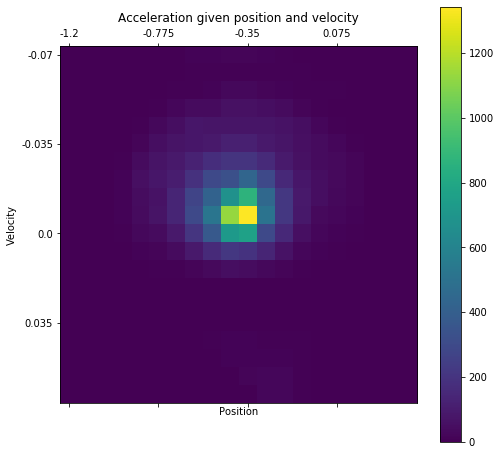

In [6]:
import warnings
def display_policy(policy):
    fig, ax1 = plt.subplots(figsize=(8, 8))
    mat_plot = ax1.matshow(policy)
    ax1.set_xlabel('Position')
    ax1.set_ylabel('Velocity')
    img = ax1.set_title('Acceleration given position and velocity')
    mat_plot = ax1.matshow(policy)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        ax1.set_xticklabels(['', '-1.2', '-0.775', '-0.35', '0.075', '0.5'])
        ax1.set_yticklabels(['', '-0.07', '-0.035', '0.0', '0.035', '0.07'])
    plt.colorbar(mat_plot)
    plt.show()
    
display_policy(stochastic_policy)  

Execute the code in the cell below applies the policy to the mountain-car with stochastic actions. 

In [7]:
def policy_time_step(x_knot, x_dot_knot, policy, sigma = 1.0):
    '''Function uses a stochastic policy to take a time step 
    as predicted by the target model. The function also returns if the episode is done''' 
    x = [x_knot]
    x_dot = [x_dot_knot]
    actions = [0.0]
    done = False
    
#    for i in range(400):
    for i in range(400):    
        a, x_prime, x_dot_prime, reward, done = next_action(x[i], x_dot[i], sigma, policy)
        i =+ 1
        x.append(x_prime)
        x_dot.append(x_dot_prime)
        actions.append(a)
    return x, x_dot, actions

In [8]:
x_steps, x_dot_steps, action_steps = policy_time_step(-0.01, 0.0, stochastic_policy)

> **Exercise 10-1-3:** The code in the cell below displays the car position, velocity and un-normalized action, or policy parameter, over the time steps. Execute this code and examine the results. Then, answer the questions. 

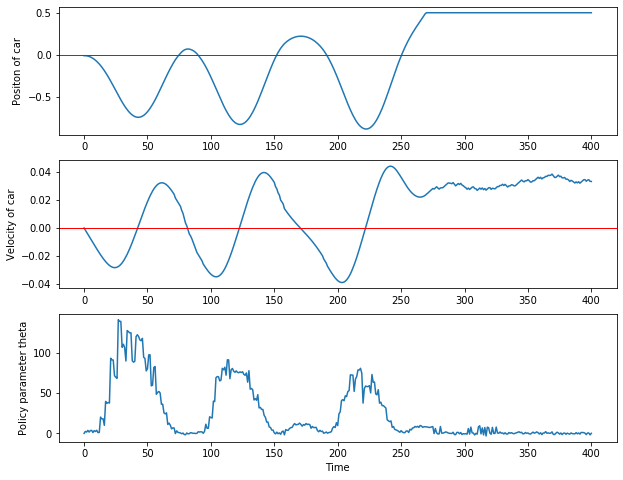

In [9]:
def plot_car_a(x, x_dot, a):    
    ## Plot car position
    fig = plt.figure(figsize = (10,8))
    ax1 = fig.add_subplot(311)    
    ax1.plot(x)
    ax1.axhline(0.0, xmin=0.0, xmax=len(x), linewidth=1, color='r')
    ax1.set_ylabel('Positon of car')
    
    ## PLot car velocity
    ax2 = fig.add_subplot(312)  
    ax2.plot(x_dot)
    ax2.axhline(0.0, xmin=0.0, xmax=len(x_dot), linewidth=1, color='r')
    ax2.set_ylabel('Velocity of car')
    
    ## PLot acceleration
    ax2 = fig.add_subplot(313)  
    ax2.plot(a)
    ax2.set_ylabel('Policy parameter theta')
    ax2.set_xlabel('Time')
    
plot_car_a(x_steps, x_dot_steps, action_steps)    

> Provide short answers to the following questions:   
> 1. What evidence do you see that the car achieves the goal?    
> 2. What evidence do you see that the action arising from the actor-critic algorithm is continuous and stochastic?   

> **Answers:**   
> 1. The evidence is that the position plot is showing the car reaching the +0.5 goal position (Flag position)  
> 2.   

## Advantage Actor-Critic Methods

As previously mentioned, approximate policy gradients can have high variance. We can now introduce a **baseline function** to find a policy gradient with lower variance. This approach leads to the **advantage actor-critic** method.

### Introduce a baseline

One way to reduce variance is simply to find a formulation with a smaller range of values. As long as the expectation policy gradient is not changed, the algorithm will still converge to the correct solution.These considerations lead to the introduction of a **baseline function**.   

The expectation of the policy gradient with an arbitrary baseline function can be written:  

$$\nabla_{\theta} J(\mathbf{\theta}) \propto \sum_s \mu(s) \sum_a \nabla_\theta \pi(a|S_t,\mathbf{\theta})\ \big( q_\pi(s,q) - b(s) \big)\\ 
= \mathbb{E}_{\pi_\theta} \big[ \sum_a\nabla_\theta \pi(a|S_t,\mathbf{\theta})\ \big( q_\pi(s,q) - b(s) \big) \big]$$

Including a baseline function does not change the expectation of the gradient, as can be seen by the following relationship:  

$$\sum_a\nabla_\theta \pi(a|S_t,\mathbf{\theta})\ b(s) = b(s) \sum_a\nabla_\theta \pi(a|S_t,\mathbf{\theta}) = b(s)\ \nabla_\theta 1 = 0 $$

### The advantage function  

As has been mentioned, the ideal baseline function must not change the expectation of the policy gradient. A good choice of baseline function is the **state-value**, which leads to the **advantage function**:  

$$A_{\pi_\theta}(s,a) = Q_{\pi_\theta}(s,a) - V_{\pi_\theta}(s)$$

The advantage function is the difference between the action-value function and value function. At convergence the difference between state-value and action-value is 0. Thus, variance is minimized. 

The lower variance policy gradient for the advantage function is:  

$$\nabla_{\theta} J(\mathbf{\theta}) = \mathbb{E}_{\pi_\theta} \big[ \nabla_\theta\ log\ \pi_\theta(s,a)\ A_{\pi_\theta}(s,a) \big]$$  

The parameter update is then:

$$\Delta \theta = \alpha\ \nabla_\theta\ log\ \pi_\theta(s,a)\ A_{\pi_\theta}(s,a)$$

#### Copyright 2019, 2022, Stephen F. Elston. All rights reserved.